In [1]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
# step 0, get your own twitter credentials!

In [2]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = '85ISfWJDMJeACvX6qammQVWpa'
api_secret = 'IjeUodDyULeHuzqwnUJzyoUjadv99FVfnMvIj1gMToO3uV1aL1'
access_token = '766537586898677764-PUN1SuMfiKZGiVNnTiwrnuCiea7p7lx'
access_secret = 'HlT7DuAFFmZEoeo3STxaYz85lclXQXG7FX4oylh91Gb3w'

In [3]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [4]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# 37.781157,-122.39872 is the lat,lng for SF
hilary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,10mi") + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [5]:
the_donald_tweets[0].text

u".@U2 vs Trump. Bono slams #DonaldTrump's wall at #DF16 benefit concert. https://t.co/regj3rx8N2"

In [6]:
hilary_tweets[0].text

u'Seriously... @NPR is free...Doesn\'t anyone remember what a "reliable source" means? Radio uses less Cell Data.\u2026 https://t.co/QE5cPPzNG0'

In [7]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [8]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].coordinates

2016-10-06 06:18:34
.@U2 vs Trump. Bono slams #DonaldTrump's wall at #DF16 benefit concert. https://t.co/regj3rx8N2
8
False
en
None
3
False
None


In [9]:
# modify the tweets to make a nice dictionary
def parse_status_objects(tweet_list):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates
                ])
    return modified_tweets
        
hilary_tweets = parse_status_objects(hilary_tweets)
the_donald_tweets = parse_status_objects(the_donald_tweets)

In [10]:
print the_donald_tweets[0]
print hilary_tweets[0]

[datetime.datetime(2016, 10, 6, 6, 18, 34), u".@U2 vs Trump. Bono slams #DonaldTrump's wall at #DF16 benefit concert. https://t.co/regj3rx8N2", 8, False, u'en', None, 3, False, None]
[datetime.datetime(2016, 10, 6, 6, 33, 40), u'Seriously... @NPR is free...Doesn\'t anyone remember what a "reliable source" means? Radio uses less Cell Data.\u2026 https://t.co/QE5cPPzNG0', 0, False, u'en', None, 0, False, None]


In [11]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, retweet count, retweeted, coordinates

import pandas as pd
from collections import deque


hilary = pd.DataFrame(hilary_tweets)
donald = pd.DataFrame(the_donald_tweets)

hilary.columns = ['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet_count', 'retweeted', 'coordinates']
donald.columns = ['date', 'text', 'favorite_count', 'favorited', 'language', 'geocode', 'retweet_count', 'retweeted', 'coordinates']

combined_tweets = pd.concat([hilary,donald])

combined_tweets

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates
0,2016-10-06 06:33:40,Seriously... @NPR is free...Doesn't anyone rem...,0,False,en,None,0,False,None
1,2016-10-06 06:29:16,I don't think #Trump has ever had a #dog. I'll...,0,False,en,None,0,False,None
2,2016-10-06 06:17:23,"RT @SF4Hillary: Elizabeth Warren: “Our health,...",0,False,en,None,9,False,None
3,2016-10-06 06:06:20,#ImWithHer #deplorables think of everyone who ...,0,False,en,None,0,False,None
4,2016-10-06 05:56:11,#WakeUpAmerica #HillaryClinton #Hillary #imwit...,1,False,und,None,0,False,None
5,2016-10-06 05:53:43,"Emphatic, 'The Atlantic' Editors Endorse Hilla...",0,False,en,None,0,False,None
6,2016-10-06 05:49:53,RT @SF4Hillary: Johnny is a Bernie supporter a...,0,False,en,None,29,False,None
7,2016-10-06 05:45:27,"Pence: ""Because controlling a woman's reproduc...",2,False,en,None,3,False,None
8,2016-10-06 05:38:08,10:1 that Trump refuses to participate in 3rd ...,0,False,en,None,0,False,None
9,2016-10-06 05:31:43,Do not be complacent! Trump Rocked By New Nati...,0,False,en,None,0,False,None


In [12]:
# 3 Create a function to take in a string and output the textblob sentiment of that string

from textblob import TextBlob, Word

def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

detect_sentiment('Bernie says Hillary is absolutely correct')

0.2

In [13]:
# 4 Add a column to your data frame called 'sentiment'
# which holds the sentiment of that tweet (hint: use the function from #3)


combined_tweets['sentiment'] = combined_tweets.text.apply(detect_sentiment)
    
combined_tweets

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment
0,2016-10-06 06:33:40,Seriously... @NPR is free...Doesn't anyone rem...,0,False,en,None,0,False,None,-0.250000
1,2016-10-06 06:29:16,I don't think #Trump has ever had a #dog. I'll...,0,False,en,None,0,False,None,-0.033333
2,2016-10-06 06:17:23,"RT @SF4Hillary: Elizabeth Warren: “Our health,...",0,False,en,None,9,False,None,0.000000
3,2016-10-06 06:06:20,#ImWithHer #deplorables think of everyone who ...,0,False,en,None,0,False,None,-0.400000
4,2016-10-06 05:56:11,#WakeUpAmerica #HillaryClinton #Hillary #imwit...,1,False,und,None,0,False,None,0.000000
5,2016-10-06 05:53:43,"Emphatic, 'The Atlantic' Editors Endorse Hilla...",0,False,en,None,0,False,None,0.000000
6,2016-10-06 05:49:53,RT @SF4Hillary: Johnny is a Bernie supporter a...,0,False,en,None,29,False,None,0.000000
7,2016-10-06 05:45:27,"Pence: ""Because controlling a woman's reproduc...",2,False,en,None,3,False,None,-0.300000
8,2016-10-06 05:38:08,10:1 that Trump refuses to participate in 3rd ...,0,False,en,None,0,False,None,0.000000
9,2016-10-06 05:31:43,Do not be complacent! Trump Rocked By New Nati...,0,False,en,None,0,False,None,0.136364


# 5 create a word count column, which holds the number of words in the text column



In [14]:
import string 

combined_tweets['word_count'] = combined_tweets.text.apply(lambda x: len(x.split()))

combined_tweets

combined_tweets.shape



(598, 11)

In [15]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
# Don't add count vectorizer result to the original dataframe

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(combined_tweets['text']).toarray(), columns=vect.get_feature_names())

tf.shape

new_table = pd.concat([combined_tweets, tf],axis=1, join_axes=[combined_tweets.index])
new_table

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,...,ywk3j9qoau,yykfohtwxj,yzjnna3hyj,zb5fxopkgh,zenpopart,zie2y6m6dk,zmfe1wsfn1,zones,ztrn891uxr,zxjs7nlnsy
0,2016-10-06 06:33:40,Seriously... @NPR is free...Doesn't anyone rem...,0,False,en,None,0,False,None,-0.250000,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-06 06:29:16,I don't think #Trump has ever had a #dog. I'll...,0,False,en,None,0,False,None,-0.033333,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-06 06:17:23,"RT @SF4Hillary: Elizabeth Warren: “Our health,...",0,False,en,None,9,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-06 06:06:20,#ImWithHer #deplorables think of everyone who ...,0,False,en,None,0,False,None,-0.400000,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-06 05:56:11,#WakeUpAmerica #HillaryClinton #Hillary #imwit...,1,False,und,None,0,False,None,0.000000,...,0,1,0,0,0,0,0,0,0,0
5,2016-10-06 05:53:43,"Emphatic, 'The Atlantic' Editors Endorse Hilla...",0,False,en,None,0,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,0
6,2016-10-06 05:49:53,RT @SF4Hillary: Johnny is a Bernie supporter a...,0,False,en,None,29,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,2016-10-06 05:45:27,"Pence: ""Because controlling a woman's reproduc...",2,False,en,None,3,False,None,-0.300000,...,0,0,0,0,0,0,0,0,0,0
8,2016-10-06 05:38:08,10:1 that Trump refuses to participate in 3rd ...,0,False,en,None,0,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,2016-10-06 05:31:43,Do not be complacent! Trump Rocked By New Nati...,0,False,en,None,0,False,None,0.136364,...,0,0,0,0,0,0,0,0,0,0


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

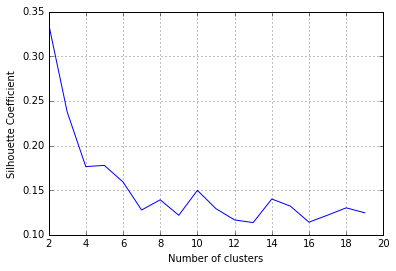

In [16]:
# 6 Use kmean to create clusters for the dataframe (choose an optimal k)
# Don't add clusters to the original dataframe

from sklearn.cluster import KMeans
from sklearn import metrics


X = new_table.drop(['date','text','favorited','language','geocode','retweet_count','retweeted','coordinates'], axis=1)


k_range = range(2, 20)
scores = []

# km = KMeans(n_clusters=3)
# km.fit(X)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))


%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# 3 is the best 

km = KMeans(n_clusters=2)
km.fit(X)

# 7 Explore the clusters
# Cluster Exploration
We examine the clusters by running the following commands.
```sh
new_table['clusters'] = km.labels_
pd.options.display.max_colwidth = 200
new_table.groupby('clusters').mean()
```

This groups our results by cluster, and examines the mean values of each. There are notable differences in averages for favorite_count and retweet_count.

# Cluster 0

Cluster 0 consists of tweets that primarily have high favorite counts and low retweet counts. These tweets also average 11 words. Cluster 0 likely represents tweets that are more meaningful, insightful and inspiring. Closed thoughts that people may want to re-read at a future date.


# Cluster 1

Cluster 1 differs from 0 by having a much lower favourite count, but instead a much higher retweet count. Additionally these tweets tend to be a little longer in length; averaging 19 words. These tweets are likely about more heated topics and agressive in nature. As a result, people feel more compelled to reply (either to agree or disagree), resulting in a higher retweet count (and more words / tweet).


In [17]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for hilary and 0 for donald trump
# Make a boxplot of sentiment for each candidate by the "democrat" column

def isHilary(input):
    hilarytags = ["#imwithher", "#hillaryclinton", "#hillary2016"]
    if any(x in input.lower() for x in hilarytags):
        return 1
    else:
        return 0
    
    
combined_tweets['democrat'] = combined_tweets.text.apply(isHilary)
new_table['democrat'] = combined_tweets['democrat']

new_table

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,sentiment,...,yykfohtwxj,yzjnna3hyj,zb5fxopkgh,zenpopart,zie2y6m6dk,zmfe1wsfn1,zones,ztrn891uxr,zxjs7nlnsy,democrat
0,2016-10-06 06:33:40,Seriously... @NPR is free...Doesn't anyone rem...,0,False,en,None,0,False,None,-0.250000,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-06 06:29:16,I don't think #Trump has ever had a #dog. I'll...,0,False,en,None,0,False,None,-0.033333,...,0,0,0,0,0,0,0,0,0,1
2,2016-10-06 06:17:23,"RT @SF4Hillary: Elizabeth Warren: “Our health,...",0,False,en,None,9,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,2016-10-06 06:06:20,#ImWithHer #deplorables think of everyone who ...,0,False,en,None,0,False,None,-0.400000,...,0,0,0,0,0,0,0,0,0,1
4,2016-10-06 05:56:11,#WakeUpAmerica #HillaryClinton #Hillary #imwit...,1,False,und,None,0,False,None,0.000000,...,1,0,0,0,0,0,0,0,0,1
5,2016-10-06 05:53:43,"Emphatic, 'The Atlantic' Editors Endorse Hilla...",0,False,en,None,0,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,1
6,2016-10-06 05:49:53,RT @SF4Hillary: Johnny is a Bernie supporter a...,0,False,en,None,29,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,1
7,2016-10-06 05:45:27,"Pence: ""Because controlling a woman's reproduc...",2,False,en,None,3,False,None,-0.300000,...,0,0,0,0,0,0,0,0,0,0
8,2016-10-06 05:38:08,10:1 that Trump refuses to participate in 3rd ...,0,False,en,None,0,False,None,0.000000,...,0,0,0,0,0,0,0,0,0,1
9,2016-10-06 05:31:43,Do not be complacent! Trump Rocked By New Nati...,0,False,en,None,0,False,None,0.136364,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# The cateogrical response here is predict democrat or republican
# Your features can EITHER be your countvectorizer document term matrix OR 
# data from the original dataframe (sentiment, word count, etc)

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

X = tf 
y = new_table['democrat']

knn_results = []
logreg_results = []

for i in range(5):
    features_train, features_test, response_train, response_test = train_test_split(X,y)
    knn = KNeighborsClassifier(n_neighbors=3) 
    knn.fit(features_train,response_train)
    knn_results.append(knn.score(features_test,response_test))
    logreg = LogisticRegression()
    logreg.fit(features_train,response_train)
    logreg_results.append(logreg.score(features_test,response_test))


results = pd.DataFrame({'knn':knn_results, 'logreg':logreg_results})
results.mean()

knn       0.821333
logreg    0.978667
dtype: float64

In [19]:
# 10 Initialize a classification model (for both knn and logistic)
# This is separate from step 9 because I will eventually want a 
# confusion matrix and we can't do that via cros validation

X = tf 
y = new_table['democrat']

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X,y)
print knn.score(X,y)

logreg = LogisticRegression()
logreg.fit(X,y)
print logreg.score(X,y)


0.933110367893
1.0


In [22]:
# 11 Split your data into training and testing tests and then
# train your classification model  (for both knn and logistic)

features_train, features_test, response_train, response_test = train_test_split(X,y)

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(features_train,response_train)

logreg = LogisticRegression()
logreg.fit(features_train,response_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# 12 Predict on your test features and targets (for both knn and logistic)

knn_preds = knn.predict(features_test)
print knn_preds

log_preds = logreg.predict(features_test)
print log_preds


[1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0
 0 1]
[1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0]


In [24]:
# 13 output your accuracy (for both knn and logistic)

print knn.score(features_test,response_test)
print logreg.score(features_test,response_test)


0.846666666667
1.0


In [25]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
# What is the sensitivity and specificity?

from nltk import ConfusionMatrix

print ConfusionMatrix(list(response_test), list(knn_preds))

print ConfusionMatrix(list(response_test), list(log_preds))

print 'knn sensitivity: ', 78.0/(78+4)

print 'logreg sensitivity: ', 81.0/(81+1)

print 'knn specificity: ',52/(52+23.0)

print 'logreg specificity: ', 72/(72+3.0)

  |  0  1 |
--+-------+
0 |<53>19 |
1 |  4<74>|
--+-------+
(row = reference; col = test)

  |  0  1 |
--+-------+
0 |<72> . |
1 |  .<78>|
--+-------+
(row = reference; col = test)

knn sensitivity:  0.951219512195
logreg sensitivity:  0.987804878049
knn specificity:  0.693333333333
logreg specificity:  0.96


In [26]:
# 15 Who is the easiest candidate to predict? Why do you think? 
# Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)

log_accuracy = pd.DataFrame({'actual':response_test, 'preds':log_preds})
knn_accuracy = pd.DataFrame({'actual':response_test, 'preds':knn_preds})

print 'hilary_log :', log_accuracy[(log_accuracy['actual'] == 1) & (log_accuracy['actual'] == log_accuracy['preds'])].count() / float(log_accuracy['actual'][log_accuracy['actual']==1].count())
print 'trump_log :', log_accuracy[(log_accuracy['actual'] == 0) & (log_accuracy['actual'] == log_accuracy['preds'])].count() / float(log_accuracy['actual'][log_accuracy['actual']==0].count())



print 'hilary_knn :', knn_accuracy[(knn_accuracy['actual'] == 1) & (knn_accuracy['actual'] == knn_accuracy['preds'])].count() / float(knn_accuracy['actual'][knn_accuracy['actual']==1].count())
print 'trump_knn :', knn_accuracy[(knn_accuracy['actual'] == 0) & (knn_accuracy['actual'] == knn_accuracy['preds'])].count() / float(knn_accuracy['actual'][knn_accuracy['actual']==0].count())




hilary_log : actual    1.0
preds     1.0
dtype: float64
trump_log : actual    1.0
preds     1.0
dtype: float64
hilary_knn : actual    0.948718
preds     0.948718
dtype: float64
trump_knn : actual    0.736111
preds     0.736111
dtype: float64


# 15. Who is easiest to predict?

It appears Hilary is easier to predict. This could be because Trummp supporters are more irrational and therefore more unpredictable (half kidding, not really sure why).

In [ ]:
# 16 BONUS: make a pipeline with the first step being a feature union of countvectorizer
# and tfidfvectorizer and no other features and our second step is
# a ML model (your choice) predict our binary response


In [16]:
# 17: BONUS: grid search the model in step 16 to obtain the best features (up to you)

In [ ]:
# 18: SUPER BONUS: make a custom transformer that extracts sentiment and word count
# make a pipeline that combines countvec, tfidfvec and your custom transformer
# and try to get the possible accuracy for predicting whether or not the person is talking
# about democrats or republicans